--------------------------------------------------------------------------------

# Prepared By: Isaiah Tschetter

---------------------------------------------------------

# Problem Statement/Task:

Expert music analysts have been tasked with developing a report on the popularity of some of the most well-known, chart-topping songs. The overall objective of this report is to uncover trends and patterns in these songs to determine which elements of a song drive its popularity. The elements of a song that will be considered are as follows: BPM, mode, key, danceability, valence, energy, acousticness, artist count, release year, and release month. To do so, this report will begin by calculating a normalized popularity score for every song in the dataset. The popularity score should effectively combine all key data points from Spotify and Apple, related to its popularity, for each song, into one value. After calculating the populaity score for each song, the popularity score for each song should be visualized in a histogram to give a better idea on the range of values produced from the popularity score calculation. 

Afterward, an analysis will be conducted to understand and identify which trends are present amongst the songs contained within this dataset, in relation to their popularity score. From these identified trends and patterns, the elements of a song that may actually drive a song's popularity will be identified. Lastly, these elements that were identified will be visualized to help understand which ones drive a song's popularity the most and, overall, which ones of them do indeed drive a song's popularity. 

---------------------------------------------------------

# Data Dictionary:
| Variable | Description |
| --- | :--- |
| track_name | The name of the song. |
| artist(s)_name | The name(s) of the artist(s) of the song. |
| artist_count	 | The number of artists that made the song. |
| released_year | The year that the song was released. |
| released_month | The month that the song was released. |
| in_spotify_playlists | The number of playlists on Spotify that include the song. |
| in_spotify_charts | This is not only the rank of the song on the Spotify charts, but it also shows whether or not it is even present. A value of 0 denotes that the song never made it on the charts; whereas any number over 0 denotes its ranking on the chart. |
| streams | The number of streams on Spotify. |
| in_apple_playlists | The number of playlists on Apple that include the song. |
| in_apple_charts | This is not only the rank of the song on the Apple charts, but it also shows whether or not it is even present. A value of 0 denotes that the song never made it on the charts; whereas any number over 0 denotes its ranking on the chart. |
| bpm | The beats per minute of the song. |
| key | The key of the song. |
| mode | The mode of the song (minor or major). |
| danceability | A percent value indicating how suitable the song is for dancing. |
| valence | A percent value indicating how positive the musical content of the song is. |
| energy | A percent value indicating the perceived energy level of the song. |
| acousticness | A percent value indicating the amount of acoustic sound in the song. |

---------------------------------------------------------

# Library Imports:

In [454]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

---------------------------------------------------------

# Data Load:

In [455]:
df = pd.read_csv('spotify-2023.csv', encoding='latin-1')
df.head()
# The following conversion with ChatGPT helped me solve
# the encoding issue I was having by
# adding the "latin-1" parameter to help:
# https://chatgpt.com/share/67479f61-6998-8007-b7d1-386c07eb9fdc


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability,valence,energy,acousticness,instrumentalness,liveness,speechiness
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


--------------------------------------------------------

# Data Transformation:

### To begin this data analysis report,

We, first, must begin by calculating a normalized popularity score for each song for the purpose of *data transformation*. This will allow us to transform each column that deals with the popularity of the song into one column (i.e. this one column will be "popularity_score"). 

The following normalization formula will be used to develop a popularity score for every song:



### popularity_score = (0.33)streams'+(0.165)in_spotify_playlists'+(0.175)in_spotify_charts""+(0.165)in_apple_playlists'+(0.165)in_apple_charts""

Where,

> x' = (x - min(column x))/(max(column x) - min(column x))

> x"" = (x"-min(column x"))/(max(column x") - min(column x"))

>> x" = max(column x) - x + 1




The above normalization formula follows the min-max normalization technique discussed in the following source: https://www.geeksforgeeks.org/data-normalization-in-data-mining/

To clarify further, x' and x"" are the actual min-max normalization calculations for whatever column it is being applied to (they are the same formula), and x" is a formula used on certain columns (i.e. the columns whose highest/best value is a 1, instead of the other way around) to invert the values to make them normalizable -- as the normalization formula x' does not work on columns whose highest/best value is 1.

--------------------------------------------------------

So, to begin, we will start by finding the highest and lowest values for each column that is a part of the popularity_score formula:

In [456]:
streams_max = df['streams'].max()
streams_min = df['streams'].min()

spotifyp_max = df['in_spotify_playlists'].max()
spotifyp_min = df['in_spotify_playlists'].min()

applep_max = df['in_spotify_playlists'].max()
applep_min = df['in_spotify_playlists'].min()

You'll notice that I left out the calculation for the max and min values of the chart columns (for Spotify and Apple). This is intentional as, in the next step, we will perform the inverse formula (i.e. x") for those columns entirely and update those columns with the new values. Then, we will calculate the max and min values for those columns as well.

In [457]:
# First, we find the inversed max values to assist in the computation:
spotifyc_max = df['in_spotify_charts'].max() - 1 + 1
applec_max = df['in_apple_charts'].max() - 1 + 1 

# Then, we can do the calculation for the whole column at once:
df['in_spotify_charts'] = df['in_spotify_charts'].apply(
    lambda x: spotifyc_max - x + 1 if x != 0 else 0)
df['in_apple_charts'] = df['in_apple_charts'].apply(
    lambda x: applec_max - x + 1 if x != 0 else 0)

# Finally, we can easily solve for the min values of the columns, as well:
spotifyc_min = df[df['in_spotify_charts'] != 0]['in_spotify_charts'].min()
applec_min = df[df['in_apple_charts'] != 0]['in_apple_charts'].min()

df[['in_spotify_charts', 'in_apple_charts']]

,in_spotify_charts,in_apple_charts
0,1,13
1,100,150
2,35,69
3,48,69
4,98,143
...,...,...
947,0,263
948,0,0
949,0,0
950,0,250


Now, we have properly calculated the max and min values for each column that is a part of the popularity_score calculation. Furthermore, we have properly inversed the values in the "charts" columns for the sake of normalization. 

-------------------------------------------------------------------------------

#### We will now move into actually calculating the popularity score:

In [ ]:
# First, we do the max-min normalizations for each column:
streams = (df['streams']-streams_min)/(streams_max-streams_min)
in_spotify_playlists =\
    (df['in_spotify_playlists']-spotifyp_min)/(spotifyp_max-spotifyp_min)
in_spotify_charts =\
    (df['in_spotify_charts']-spotifyc_min)/(spotifyc_max-spotifyc_min)
in_apple_playlists =\
    (df['in_apple_playlists']-applep_min)/(applep_max-applep_min)
in_apple_charts =\
    (df['in_apple_charts']-applec_min)/(applec_max-applec_min)
# In the above calculation, the songs that had a 0 for their data 
# (such as in the charts column) would end up solving out
# to a negative value. So, we must take all of those negative values
#  and change them back to a zero.
# We do so in the following lines of code:
streams = streams.apply(lambda x: 0 if x < 0 else x)
in_spotify_playlists = in_spotify_playlists.apply(lambda x: 0 if x < 0 else x)
in_spotify_charts = in_spotify_charts.apply(lambda x: 0 if x < 0 else x)
in_apple_playlists = in_apple_playlists.apply(lambda x: 0 if x < 0 else x)
in_apple_charts = in_apple_charts.apply(lambda x: 0 if x < 0 else x)

# Then, we combine them all together into one new column:
df['popularity_score'] =\
    (0.33)*streams + (0.165)*in_spotify_playlists + (0.175)*in_spotify_charts\
    + (0.165)*in_apple_playlists + (0.165)*in_apple_charts
df['popularity_score']

0      0.021489
1      0.224861
2      0.098636
3      0.193329
4      0.238642
         ...   
947    0.168895
948    0.014444
949    0.008241
950    0.165898
951    0.339462
Name: popularity_score, Length: 952, dtype: float64

---------------------------------------------------------------------------------

Now, we have properly determined the popularity score for each and every song. To help us get a better understanding of the distribution of each song's popularity, we will graph it with a histogram.

Text(0.5, 1.0, 'Bell Curve of the Popularity Score for Every Song')

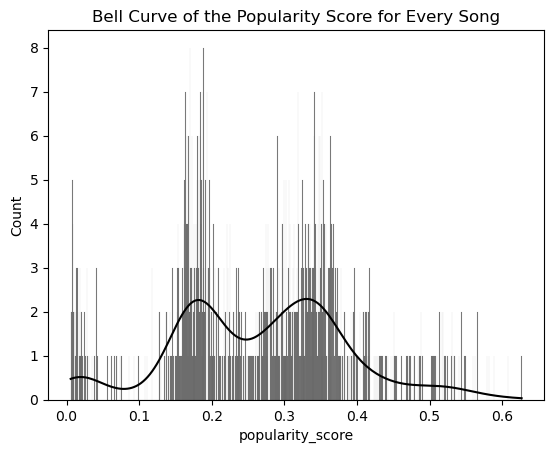

In [459]:
sns.histplot(df['popularity_score'], bins=951, color='k', kde=True)
plt.title('Bell Curve of the Popularity Score for Every Song')

So, according to the bell curve above, the more popular songs tend to have a popularity score of about 0.35 or greater. We can also see that the highest value on the graph does not exceed 0.7, which means we shouldn't expect the most popular songs to have values of anything higher than that. Also, the majority of songs have a value of about 0.25!

----------------------------------------------------------------------------------------------------------------------

# Data Cleaning:

**Now that we have successfully transformed the data,** 

We will **clean** out data that is in the way of our data analysis. Specifically, we will remove the entire instrumentalness column due to the fact that most of the songs have a 0 for this column. Secondly, we will also be removing the speechiness column entirely due to the fact that a super-majority of the songs have a value that is between 0-10 -- which is not enough variance for the data to really pull any insights from it. Thirdly, we will remove the released_day column as pulling any data insights from that column will prove to be next to impossible. We will also be removing the following columns, due to the fact that most of the songs have a 0 as their value or a low degree of variance in the values for these columns: 'in_deezer_playlists,' 'in_deezer_charts,' and 'in_shazam_charts.' 

We will also move the song title to be the index values for each row.

In [ ]:
df = df.drop(columns=['speechiness', 'instrumentalness',\
    'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts',\
    'released_day'])
df = df.set_index('track_name', drop=True)
df

,artist(s)_name,artist_count,released_year,released_month,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,bpm,key,mode,danceability,valence,energy,acousticness,liveness,popularity_score
track_name,,,,,,,,,,,,,,,,,,
Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,553,1,141381703,43,13,125,B,Major,80,89,83,31,8,0.021489
LALA,Myke Towers,1,2023,3,1474,100,133716286,48,150,92,C#,Major,71,61,74,7,10,0.224861
vampire,Olivia Rodrigo,1,2023,6,1397,35,140003974,94,69,138,F,Major,51,32,53,17,31,0.098636
Cruel Summer,Taylor Swift,1,2019,8,7858,48,800840817,116,69,170,A,Major,55,58,72,11,11,0.193329
WHERE SHE GOES,Bad Bunny,1,2023,5,3133,98,303236322,84,143,144,A,Minor,65,23,80,14,11,0.238642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
My Mind & Me,Selena Gomez,1,2022,11,953,0,91473363,61,263,144,A,Major,60,24,39,57,8,0.168895
Bigger Than The Whole Sky,Taylor Swift,1,2022,10,1180,0,121871870,4,0,166,F#,Major,42,7,24,83,12,0.014444
A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,573,0,73513683,2,0,92,C#,Major,80,81,67,4,8,0.008241


**Now,**

We have finished our data cleaning and data transformation. Therefore, our data is now ready to be explored, analyzed, and visualized!

----------------------------------------------------------------------------------------------------------

# Data Exploration/Analysis:

Now that we have successfully transformed and cleaned our data, we will begin by identifying intial trends in songs that have high popularity scores. That means identifying common patterns between popularity_score and other columns in the DataFrame such as bpm and mode. Therefore, we be exploring the connection between popularity_score and the following columns: artist_count, released_year, released_month, bpm, key, mode, danceability, valence, energy, acousticness, liveness.

To begin, we will measure which values are most common amongst the songs that rank high in the popularity score, compared to the songs that rank low. This also means taking the average in the cases where a value count is not useful. 

### Looking at BPM, first:

In [461]:
df[df['popularity_score'] > 0.35]['bpm'].mean()

124.73364485981308

In [462]:
df[df['popularity_score'] < 0.2]['bpm'].mean()

121.51632047477744

In [463]:
df[df['popularity_score'] < 0.12]['bpm'].mean()

123.05263157894737

In [464]:
df[df['popularity_score'] > 0.5]['bpm'].mean()

122.35135135135135

The following is the mean value for every songs bpm in this dataset:

In [465]:
df['bpm'].mean()

122.55357142857143

This insight shows that there is most likely not a connection between bpm and popularity score due to the fact that the songs with the lowest popularity score have an average BPM that is very similar to the songs that have the highest popularity score. This seems logical as the quality of a song is not determined by the pace that it moves at. 

### Now, looking at the mode:

In [466]:
df[df['popularity_score'] > 0.349]['mode'].value_counts()

mode
Major    141
Minor     78
Name: count, dtype: int64

In [467]:
df[df['popularity_score'] < 0.2]['mode'].value_counts()

mode
Major    197
Minor    140
Name: count, dtype: int64

We can see here, already, that the most popular songs tend to lean towards using Major as the mode for the song.

### Looking at the key:

In [468]:
df[df['popularity_score'] < 0.3]['key'].value_counts()

key
C#    69
G     65
G#    53
F     49
D     49
A     46
B     43
E     36
F#    33
A#    28
D#    22
Name: count, dtype: int64

In [469]:
df[df['popularity_score'] < 0.2]['key'].value_counts()

key
C#    45
G     39
D     32
G#    31
F     30
A     29
E     23
B     22
F#    21
A#    18
D#    14
Name: count, dtype: int64

In [470]:
df[df['popularity_score'] > 0.42]['key'].value_counts()

key
C#    14
A#     8
D      6
G      6
B      6
E      6
F      6
F#     6
G#     4
A      4
D#     3
Name: count, dtype: int64

In [471]:
df[df['popularity_score'] > 0.32]['key'].value_counts()

key
C#    48
F     34
B     33
F#    31
D     30
G#    28
A#    26
G     25
E     23
A     20
D#    10
Name: count, dtype: int64

We can see, here, that there might genuinely be a connection between the key of a song and its following success. You'll notice that the songs that didn't score very high in the popularity_score (i.e. less than 0.3) were normally in the C#, G, D, and G# keys. On the contrary, popular songs were most commonly in the keys C#, F, B, and A#. 

It should be noted that most songs are made in C#, as shown below:

In [472]:
df['key'].value_counts()

key
C#    120
G      96
G#     91
F      89
B      81
D      81
A      74
F#     73
E      62
A#     57
D#     33
Name: count, dtype: int64

### Now, we will move onto the purely numerical columns. First, danceability:

In [473]:
df[df['popularity_score'] > 0.5]['danceability'].mean()

58.729729729729726

In [474]:
df[df['popularity_score'] < 0.15]['danceability'].mean()

66.65686274509804

In [475]:
df[df['popularity_score'] > 0.35]['danceability'].mean()

64.69626168224299

In [476]:
df[df['popularity_score'] < 0.25]['danceability'].mean()

66.3364705882353

The following is the average danceability rating for every song in the dataset:

In [477]:
df['danceability'].mean()

66.98424369747899

Looking at the values shown above, it does seem there may be a connection between danceability and popularity of a song, but further investigation will be conducted in the data visualization/analysis phase. It is possible that more popular songs have a lower danceability rating due to the fact that the current culture does not have a strong affinity for dancing. 

### Now, we will look at valence: 

In [478]:
df[df['popularity_score'] > 0.5]['valence'].mean()

46.91891891891892

In [479]:
df[df['popularity_score'] < 0.15]['valence'].mean()

51.51960784313726

In [480]:
df[df['popularity_score'] > 0.35]['valence'].mean()

49.52803738317757

In [481]:
df[df['popularity_score'] < 0.25]['valence'].mean()

50.65176470588235

The following is the average level of valence for all of the songs:

In [482]:
df['valence'].mean()

51.40651260504202

Just as it was with danceability, it seems there may be a slight connection between valence and the overall popularity of a song -- further investigation will be conducted in the data visualization/analysis phase. As it was with danceability, the fact that the most popular songs have a slightly lower level of valence could be due to the culture. Not everyone may enjoy listening to overly happy songs. Mental health is a big issue in America (and the majority of Spotify and Apple music listeners are definitely from America).

### Next, energy:

In [483]:
df[df['popularity_score'] > 0.35]['energy'].mean()

64.93457943925233

In [484]:
df[df['popularity_score'] < 0.25]['energy'].mean()

62.578823529411764

In [485]:
df[df['popularity_score'] < 0.11]['energy'].mean()

60.625

In [486]:
df[df['popularity_score'] > 0.57]['energy'].mean()

70.6

The following is the average energy level of every song in the dataset:

In [487]:
df['energy'].mean()

64.27415966386555

From these results, it is likely that the energy of a song does not affect the popularity of it much. This is likely due to the fact that most every song has a high level of energy, within this dataset. With that said, the above calculations show that the most popular songs (i.e. songs with a score greater than 0.57) have a mean that is noticably higher than songs with a score less than 0.11. So, there is likely to still be a connection between the two.

### Moving on, acousticness:

In [488]:
df[df['popularity_score'] > 0.35]['acousticness'].mean()

25.05607476635514

In [489]:
df[df['popularity_score'] < 0.25]['acousticness'].mean()

28.181176470588234

In [490]:
df[df['popularity_score'] < 0.11]['acousticness'].mean()

30.208333333333332

In [491]:
df[df['popularity_score'] > 0.57]['acousticness'].mean()

12.6

The following is the average energy level of every song in the dataset:

In [492]:
df['acousticness'].mean()

27.07878151260504

This one was very clear. Here, there is a strong trend: the most popular songs have a low acousticness value whereas the least popular songs have a high value of acousticness. This may be due to the fact that the current genre of music that is most popular tends to use a lot of electronic type sounds (which means it wouldn't be very acoustic).

### Now, we will look at liveness:

In [493]:
df[df['popularity_score'] > 0.35]['liveness'].mean()

16.453271028037385

In [494]:
df[df['popularity_score'] < 0.25]['liveness'].mean()

18.449411764705882

In [495]:
df[df['popularity_score'] < 0.16]['liveness'].mean()

16.88976377952756

In [496]:
df[df['popularity_score'] > 0.54]['liveness'].mean()

17.615384615384617

The following is the average value of liveness amongst all of the songs:

In [497]:
df['liveness'].mean()

18.214285714285715

Looking at the values above, there isn't really a clear trend. It does seem the more popular songs tend to lean towards lower values in the liveness factor, but further investigation is required. 

### Now, we will look to see if there is any trend amongst the number of artists and the popularity of the song:

In [498]:
df[df['popularity_score'] > 0.35]['artist_count'].mean()

1.4065420560747663

In [499]:
df[df['popularity_score'] < 0.22]['artist_count'].mean()

1.5748663101604279

In [500]:
df[df['popularity_score'] < 0.13]['artist_count'].mean()

1.5555555555555556

In [501]:
df[df['popularity_score'] > 0.55]['artist_count'].mean()

1.3333333333333333

In [502]:
df['artist_count'].mean()

1.5567226890756303

Looking at the values above, it seems there may be a trend where songs that are more popular tend to have a smaller number of artists on them. Further investigation will be conducted. 

### Now, we will be looking at the released year and month, to see if there are any trends related to the song's popularity:

In [503]:
df[df['popularity_score'] > 0.35]['released_year'].mean()

2015.9205607476636

In [504]:
df[df['popularity_score'] < 0.22]['released_year'].mean()

2017.8475935828876

In [505]:
df[df['popularity_score'] < 0.13]['released_year'].mean()

2018.1234567901236

In [506]:
df[df['popularity_score'] > 0.55]['released_year'].mean()

2006.4444444444443

In [507]:
df['released_year'].mean()

2018.2888655462184

Looking at the data above, the trend is clear: the longer a song has been out, the higher its popularity score will be. This suggests that there is a strong connection between the popularity of a song and the year it was released. 

### Now, we will repeat and do this with the released month:

In [508]:
df[df['popularity_score'] > 0.35]['released_month'].mean()

5.738317757009346

In [509]:
df[df['popularity_score'] < 0.22]['released_month'].mean()

6.160427807486631

In [510]:
df[df['popularity_score'] < 0.13]['released_month'].mean()

5.728395061728395

In [511]:
df[df['popularity_score'] > 0.55]['released_month'].mean()

7.444444444444445

In [512]:
df['released_month'].mean()

6.038865546218488

It seems the mean() did not discover anything useful, so we will try counting the values, in hopes of identifying a harder to see trend:

In [513]:
df[df['popularity_score'] > 0.35]['released_month'].value_counts()

released_month
1     42
5     33
11    20
10    19
3     17
9     16
8     14
6     13
4     13
2     11
7      8
12     8
Name: count, dtype: int64

In [514]:
df[df['popularity_score'] < 0.22]['released_month'].value_counts()

released_month
5     58
1     55
11    39
6     34
10    34
3     28
12    27
2     23
7     20
9     20
4     19
8     17
Name: count, dtype: int64

In [515]:
df[df['popularity_score'] < 0.13]['released_month'].value_counts()

released_month
5     18
6     12
3      8
4      7
1      7
7      6
11     6
10     6
2      4
9      3
8      2
12     2
Name: count, dtype: int64

In [516]:
df[df['popularity_score'] > 0.5]['released_month'].value_counts()

released_month
1     12
11     5
9      5
8      3
6      3
10     2
5      2
3      2
7      1
2      1
4      1
Name: count, dtype: int64

In [517]:
df['released_month'].value_counts()

released_month
1     133
5     128
3      86
6      86
11     80
12     75
10     73
4      66
7      62
2      61
9      56
8      46
Name: count, dtype: int64

Looking at the values shown for songs that have a popularity score that is less than 0.13, we can clearly see that most of those songs were made during the middle of the year. On the contrary, looking at the values shown for songs that have a popularity score that is greater than 0.5, we can see that most of those songs were actually put out during the end and beginning of the year. It seems there may be a connection between when the song is released and it's eventual success. 

--------------------------------------------------------------------------------

### So, to summarize before moving on to data visualization:

During our data exploration, we have identified that the following elements of a song may have an effect on its overall popularity: mode, key, danceability, valence, acousticness, artist count, release year, and release month. 

-------------------------------------------------------------

# Data Visualization/Analysis:

So, moving on to the final stage of our exploratory data analysis (other than the summary of findings and conclusion), we will now begin to further test our findings from the data exploration section. Here, we will use visualizations to help us analyze and develop an answer as to what factors drive popularity the most. 

### To begin, 

We will start by visualizing the **mode** of every song, in relation to it's population score:

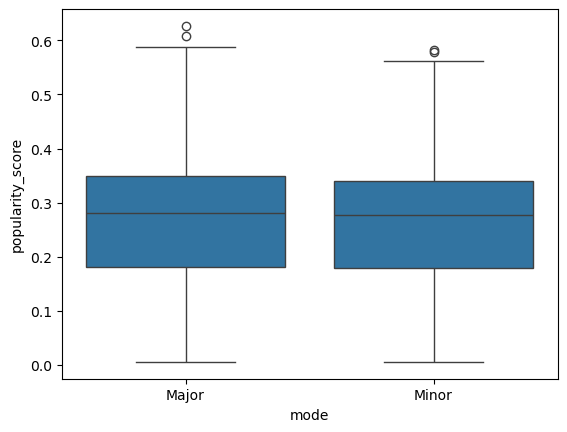

In [518]:
sns.boxplot(x=df['mode'], y=df['popularity_score'])
plt.show()
# Found everything I needed through sns.boxplot?

From the above graph, we can see that songs with a mode that is major lean even-so-slightly in the direction of having a higher popularity score. With that said, we will try a histogram visualization in hopes of making the difference more clear. First, we will plot the popularity scores of songs with a mode that is major, then we will plot the popularity scores of songs with a mode that is minor. They will be plotted on top of each other. 

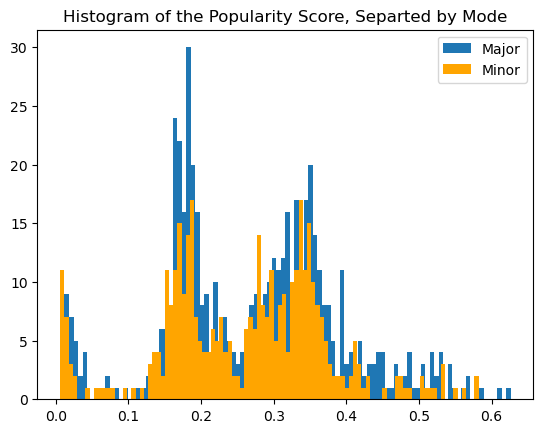

In [519]:
plt.hist(x=df[df['mode'] == "Major"]['popularity_score'], bins=100,\
        label="Major")
plt.hist(x=df[df['mode'] == "Minor"]['popularity_score'], bins=100,\
        color="orange", label="Minor")
plt.legend()
plt.title("Histogram of the Popularity Score, Separted by Mode")
plt.show()
# Found most everything I needed through plt.hist?
# The following source helped me understand how to plot two
# of them on one graph of refreshed me on stuff like the legend:
# https://how2matplotlib.com/how-to-plot-two-histograms-together-in-matplotlib.html


Looking at the graphs above, we can see that the strength of the relationship between the mode of a song and its popularity is moderately weak. With that said, it is still pretty obvious, as you can see from the histogram, that as you get to the more and more popular songs (greater than 0.45 on the popularity score), you tend to see that most of them are indeed in major -- whereas, with the less popular songs (less than 0.1 on the popularity score), it is the opposite. 

### Next, 

We will continue by visualizing the **key** of every song, in relation to it's population score:

We will start by visualizing the average popularity score of each key:

<Axes: xlabel='key', ylabel='popularity_score'>

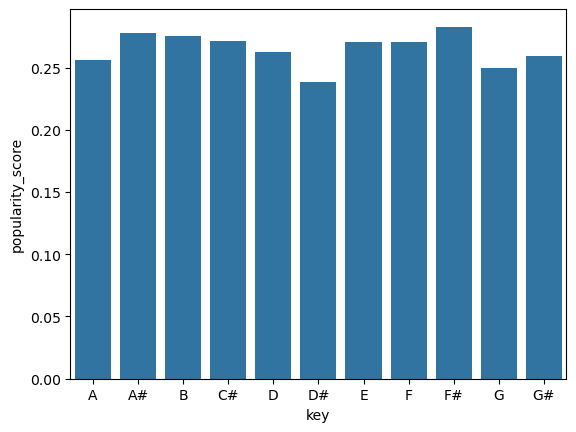

In [520]:
groupedByKey = df.groupby('key')['popularity_score'].mean()
sns.barplot(groupedByKey)

Interestingly enough, the four keys that were identified earlier as being most common amongst the most popular songs are in the top five keys that have the highest average value. It seems there is indeed a connection. Now, to further visualize that trend, we will look at plotting the data into a box plot:

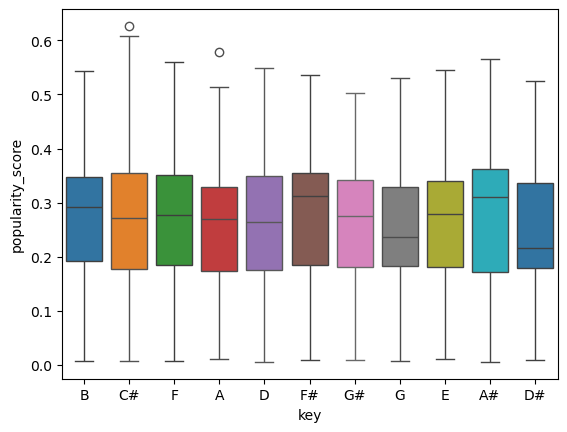

In [521]:
# In order to do this, we must plot each possible key value one by one:
certainKey = df[df['key'] == "B"]
sns.boxplot(x=certainKey['key'], y=certainKey['popularity_score'])
certainKey = df[df['key'] == "C#"]
sns.boxplot(x=certainKey['key'], y=certainKey['popularity_score'])
certainKey = df[df['key'] == "F"]
sns.boxplot(x=certainKey['key'], y=certainKey['popularity_score'])
certainKey = df[df['key'] == "A"]
sns.boxplot(x=certainKey['key'], y=certainKey['popularity_score'])
certainKey = df[df['key'] == "D"]
sns.boxplot(x=certainKey['key'], y=certainKey['popularity_score'])
certainKey = df[df['key'] == "F#"]
sns.boxplot(x=certainKey['key'], y=certainKey['popularity_score'])
certainKey = df[df['key'] == "G#"]
sns.boxplot(x=certainKey['key'], y=certainKey['popularity_score'])
certainKey = df[df['key'] == "G"]
sns.boxplot(x=certainKey['key'], y=certainKey['popularity_score'])
certainKey = df[df['key'] == "E"]
sns.boxplot(x=certainKey['key'], y=certainKey['popularity_score'])
certainKey = df[df['key'] == "A#"]
sns.boxplot(x=certainKey['key'], y=certainKey['popularity_score'])
certainKey = df[df['key'] == "D#"]
sns.boxplot(x=certainKey['key'], y=certainKey['popularity_score'])

plt.show()


So, from these findings, we can see that the strength of the relationship between a song's popularity and its key is moderately weak. With that said, the data does suggest that there is still a relationship. This is due to the fact that the songs with the highest popularity score also happened to be in the keys of the keys that had the highest average popularity score. For example, in the data exploration section, it was discovered that the most common keys for the most popular songs to be written in were C#, F, B, and A#. In relation to that, we can see that the keys with the highest average popularity score were C#, F, B, A#, and F#. Furthermore, the songs that performed the worst, in terms of popularity score, happened to be made in the keys that scored the lowest in their average popularity score (i.e. G, D, and G# all scored low, yet they were most common amongst the songs that scored poorly in popularity).   

### Next, 

We will continue by visualizing the **danceability** of every song, in relation to it's population score:

For the elements of a song such as danceability, valence, and acousticness, we will be using a regplot to analyze the strength of the relationship between said factors and popularity score. We will then measure the slope of the regression line to identify any obvious trends. 

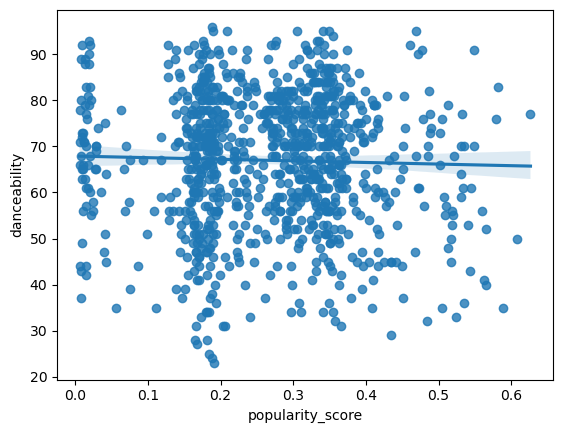

In [522]:

savedValues = sns.regplot(x=df['popularity_score'], y=df['danceability'])
plt.show()
# Found regplot in chapter 9 of the textbook

In [ ]:
# Now, we will measure the slope of the regression line:
slope, intercept, r, p, sterr = scipy.stats.linregress(
    x=savedValues.get_lines()[0].get_xdata(),\
        y=savedValues.get_lines()[0].get_ydata())
slope



-3.4776229227303173

The following source helped me understand how to measure the slope
of seaborns regression line on a regplot() (regarding the line of code above):
 https://www.statology.org/seaborn-regplot-equation/#:~:text=We%20can%20use%20the%20following%20syntax%20to%20do,equation%20slope%2C%20intercept%2C%20r%2C%20p%2C%20sterr%20%3D%20scipy.stats.linregress%28x%3Dp.get_lines%28%29%5B0%5D.get_xdata%28%29%2C

So, looking at the regression line (and its slope), we can see that there is actually a semi-strong relationship between the popularity of a song and it's danceability rating. This is because a slope of -3.5 is a rather solid trend. 

### Next, 

We will continue by visualizing the **valence** of every song, in relation to it's population score:

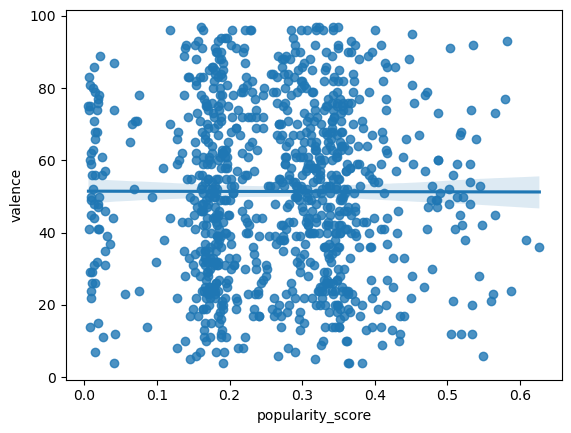

In [524]:
savedValues = sns.regplot(x=df['popularity_score'], y=df['valence'])
plt.show()

In [525]:
# Now, we will measure the slope of the regression line:
slope, intercept, r, p, sterr = scipy.stats.linregress(
    x=savedValues.get_lines()[0].get_xdata(),\
        y=savedValues.get_lines()[0].get_ydata())
slope


-0.3473138205557538

Due to the fact that these results are inconclusive, we will further test, but only the outliers:

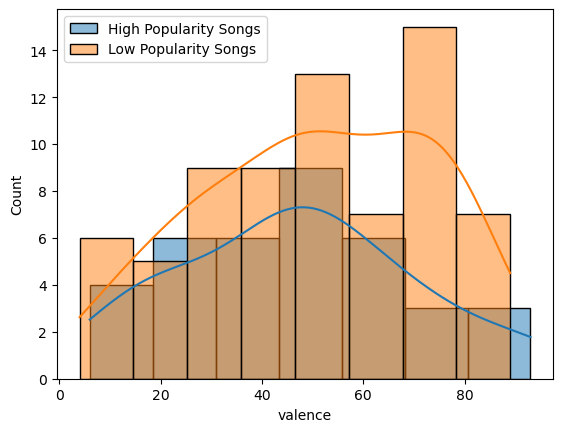

In [ ]:
high = df[df['popularity_score'] > 0.5]['valence']
low = df[df['popularity_score'] < 0.1]['valence']

sns.histplot(high, label="High Popularity Songs", kde=True)
sns.histplot(low, label="Low Popularity Songs", kde=True)
plt.legend()
plt.show()

# The following source helped me understand how to make my histplot fancy:
# Source: 
#https://www.geeksforgeeks.org/plot-multiple-histograms-on-same-plot-with-seaborn/

Now, we can see that the valence does indeed have the slightest connection to the popularity of a song. Here, we can see that there is a small, but still noticable trend that the more popular songs follow: They tend to have a little less valence. With that said, it should be noted that this relationship isn't really visible unless you start to look at the outliers. 

### Next, 

We will continue by visualizing the **energy** of every song, in relation to it's population score:

We will once again do a regplot and measure the regression line's slope. 

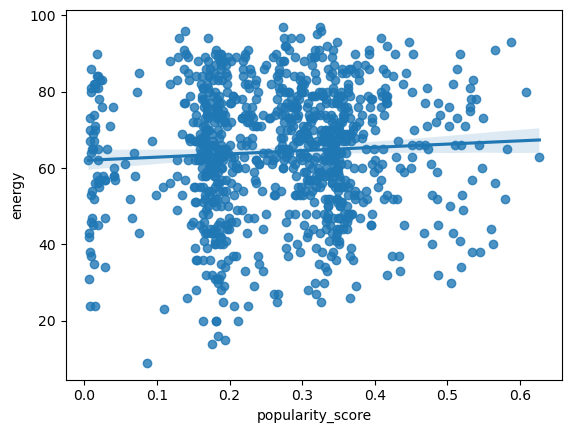

In [527]:
savedValues = sns.regplot(x=df['popularity_score'], y=df['energy'])
plt.show()

In [528]:
# Now, we will measure the slope of the regression line:
slope, intercept, r, p, sterr = scipy.stats.linregress(
    x=savedValues.get_lines()[0].get_xdata(),\
        y=savedValues.get_lines()[0].get_ydata())
slope

8.554712315541712

From these results alone, we can see that there is a significant relationship between energy and popularity score. This is the strongest relationship found, so far. This is backed up by our results found in the data exploration section. 

### Next, 

We will continue by visualizing the **acousticness** of every song, in relation to it's population score:

Once again, we will continue measuring the regression line to determine the strength of the relationship. Also, according to our results from the data exploration section, this should be our strongest relationship, yet. 

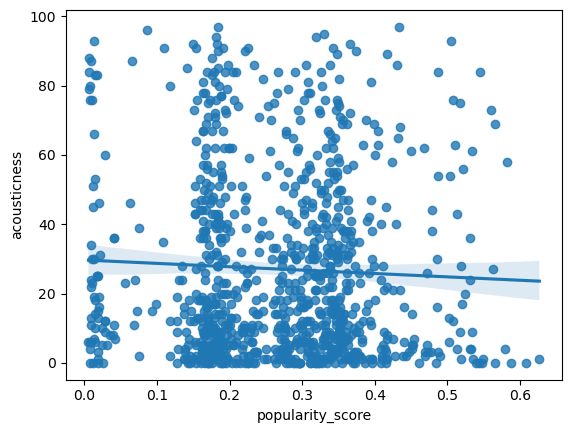

In [529]:
savedValues = sns.regplot(x=df['popularity_score'], y=df['acousticness'])
plt.show()

In [530]:
# Now, we will measure the slope of the regression line:
slope, intercept, r, p, sterr = scipy.stats.linregress(
    x=savedValues.get_lines()[0].get_xdata(),\
        y=savedValues.get_lines()[0].get_ydata())
slope

-9.745303935222031

Unsurprisingly, this is indeed the strongest relationship we have found so far. We can assume there is a definite connection between the acousticness level of a song and its popularity. 

### Now, 

We will now move onto the final three factors: artist count, release year, and release month. These three factors are expected to have a very weak relationship to the popularity score.

We will begin by analyzing artist count through box plots:

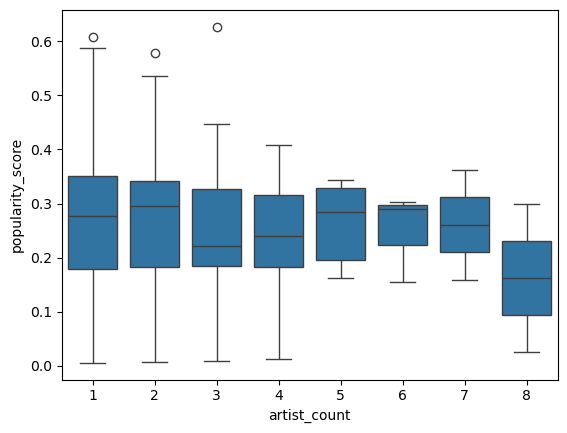

In [531]:
sns.boxplot(x=df['artist_count'], y=df['popularity_score'])
plt.show()

Now, we will do some aggregation and plot the averages into a bar plot, for further visualization:

<Axes: xlabel='artist_count', ylabel='popularity_score'>

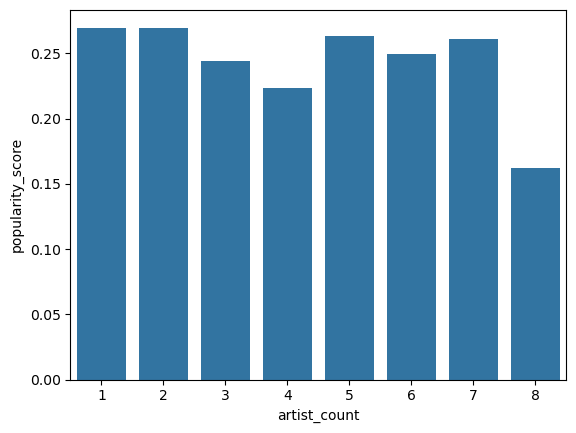

In [532]:
groupedByKey = df.groupby('artist_count')['popularity_score'].mean()
sns.barplot(groupedByKey)

So, from these two graphs, it is pretty obvious that the most popular songs tend to only have 1 to 2 artists on the track. This seems to also be a semi-strong relationship. 

### Now, 

We will look at the released year and month columns. We will measure the strength of their relationship to the popularity score via a regplot. We will, once again, measure the slope of the regression line. 

We will start by looking at released_year:

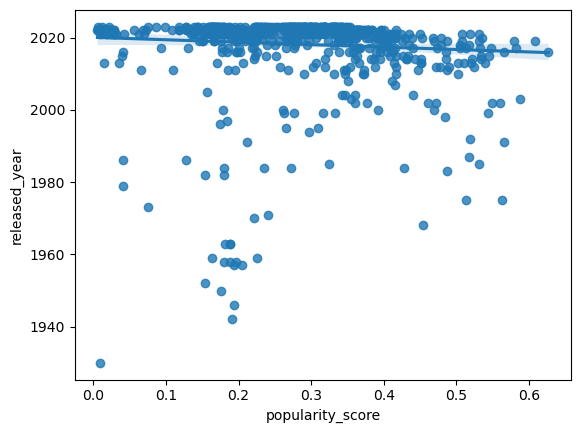

In [533]:
savedValues = sns.regplot(x=df['popularity_score'], y=df['released_year'])
plt.show()

In [534]:
# Now, we will measure the slope of the regression line:
slope, intercept, r, p, sterr = scipy.stats.linregress(
    x=savedValues.get_lines()[0].get_xdata(),\
        y=savedValues.get_lines()[0].get_ydata())
slope

-6.744196155653328

Interestingly enough, this ended up being one of the factors that has the strongest connection to the popularity score. This is supported by the fact that the songs that have been out for longer have had a longer chance of getting popular. 

### Now, 

We will look release month:

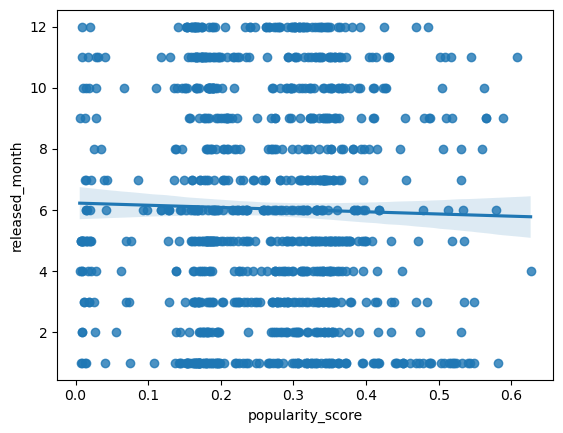

In [535]:
savedValues = sns.regplot(x=df['popularity_score'], y=df['released_month'])
plt.show()

In [536]:
# Now, we will measure the slope of the regression line:
slope, intercept, r, p, sterr = scipy.stats.linregress(
    x=savedValues.get_lines()[0].get_xdata(),\
        y=savedValues.get_lines()[0].get_ydata())
slope

-0.7171839433724373

We will further analyze this relationship via a boxplot:

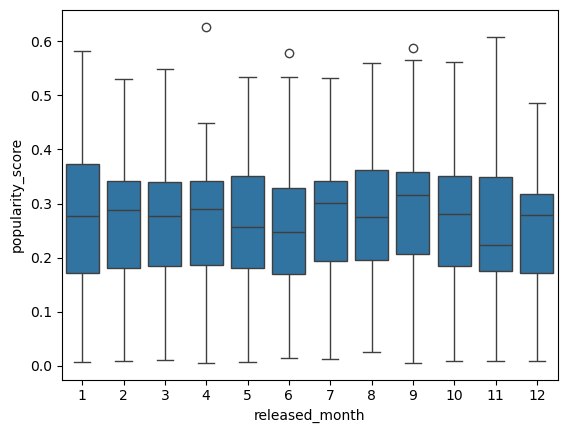

In [172]:
sns.boxplot(x=df['released_month'], y=df['popularity_score'])
plt.show()

Here, we can see that there really isn't much of a connection. With that said, we will measure if this holds true for the outliers:

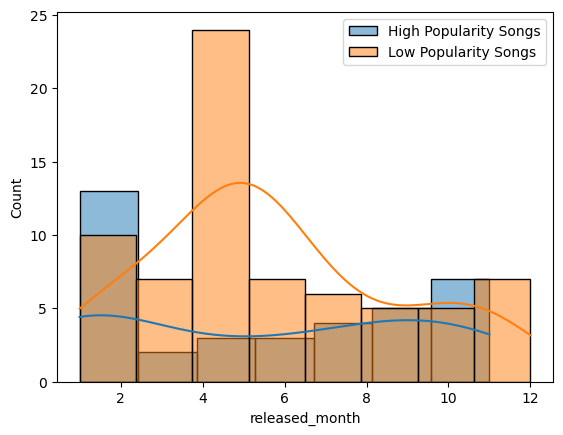

In [175]:
high = df[df['popularity_score'] > 0.5]['released_month']
low = df[df['popularity_score'] < 0.1]['released_month']

sns.histplot(high, label="High Popularity Songs", kde=True)
sns.histplot(low, label="Low Popularity Songs", kde=True)
plt.legend()
plt.show()

From these results, we can understand that the released month has very little to do with a song's success. Despite that fact, looking at the outliers, it does seem that songs that are produced during the middle of year (months 4-6) tend to perform the worst. On the contrary, the songs that performed the very best were made during the beginning/end of the year. Overall, the relationship is very weak, but still present.  

### That concludes our data visualization/analysis.

We have now compiled enough information to move on to a discussion of our findings. 

-------------------------------------------------------------------

# Discussion of Findings:

> First things first, this data analysis has been very fruitful and successful. We have uncovered numerous elements of a song that drive its popularity.

**Here is a summarized look at those findings:**

So, to summarize the findings within this report, the following elements of a song have been identified as elements that **drive popularity the most**: released year, artist count, acousticness, energy, and danceability. Furthermore, the following elements of a song also drive its popularity, just not the most: mode, key, valence, and release month. 

**Here is a more complete discussion of each of those factors:**

Looking at *release month* first:
 We see that there is a definite and solid relationship between the month artists release their songs and how well it ends up performing. With that said, this relationship was only visible when comparing the outliers to each other, so further testing would be preferred.

Looking at *release year*: We can see that there is a very obvious and strong relationship between when a song is released and its popularity. This makes sense as a song that has been released for longer has more time to gain popularity.

Looking at *artist count*: It is obvious that there is a very strong relationship here. Our data visualization showed that the more and more artists on a track, the worse and worse it performs. 

Looking at *acousticness*: This element of a song had, arguably, the strongest connection to a songs popularity. That is certainly unexpected, but makes sense as todays culture is moving towards songs that are electronically made. 

Looking at *energy*: Unsurprisingly, this element of a song had one of the strongest connections to the popularity score. People love energy, so it is no coincidence that the most popular songs had more energy than the songs with less popularity. 

Looking at *valence*: Just like released month, valence did indeed have a connection to popularity score. While it was weak, it was extremely present when looking at the outliers (i.e. people don't like songs with too much valence). Unfortunately, this finding makes sense as sad and low energy songs are very popular now-a-days.

Looking at *danceability*: Danceability had one of the stronger relationships to popularity. The trend was obvious: as we analyzed songs with more and more popularity, the level of danceability also started to fall off more and more. If this were the late 20th century this result wouldn't make any sense, but there isn't much a culture of dancing now-a-days.

Looking at *key*: The findings of this report does indeed show that the key of a song can affect its popularity, although only weakly. As stated before, the most popular songs used very different keys, on average, than the keys that the least popular songs used. Furthermore, the keys that had the highest average popularity score also happened to be used by the songs that had some of the highest popularity scores. It would be very interesting to see what further testing could find regarding this relationship. 

Finally, looking at *mode*: The findings of this report also show that mode affects a song's popularity. While this relationship is weak, looking at the outliers, it is obviously present within our dataset. The songs that had a low popularity score (less than 0.2) were made in major and minor on a 1 to 1 basis whereas the songs that had a high popularity score were made in major and minor on a 2 to 1 basis, respectively. All in all, it is clear that songs perform better, popularity-wise, when they are made in the mode major. 

And so, that concludes the discussion of our findings.

-------------------------------------------------------------------------

# Conclusion: 

So, in conclusion, this report has discovered that the following elements of a song drive its popularity the most: released year, artist count, acousticness, energy, and danceability. Secondly, the following factors have also been identified as having an effect on a song's popularity: mode, key, valence, and release month. 

This begs the question: What do these findings mean? Well, first and foremost, it means that an artist, when making a song, should recognize that the number of artists on his/her song, the level of acousticness, energy, and even danceability will all have a large impact on how successful his song is (irregardless of how 'good' he/she thinks the song is). Secondly, artists should now understand that patience is the key, sometimes success just takes time. Furthermore, the artist should recognize that small details such as the mode, key, and release month can certainly affect the songs success, as well. While artists don't usually create songs for the sake of popularity alone, these identified elements of a song should still be cautiously dealt with, when creating music.  